<a href="https://colab.research.google.com/github/LordLean/Extracting-Green-Bonds-Use-of-Proceeds/blob/main/evaluation/reader_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Retriever Dataset

In [8]:
!wget https://raw.githubusercontent.com/LordLean/Extracting-Green-Bonds-Use-of-Proceeds/main/evaluation/retriever_evaluation.csv

--2022-08-26 19:42:58--  https://raw.githubusercontent.com/LordLean/Extracting-Green-Bonds-Use-of-Proceeds/main/evaluation/retriever_evaluation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 749674 (732K) [text/plain]
Saving to: ‘retriever_evaluation.csv’

retriever_evaluatio 100%[===================>] 732.10K  --.-KB/s    in 0.05s   

2022-08-26 19:42:59 (14.9 MB/s) - ‘retriever_evaluation.csv’ saved [749674/749674]



In [9]:
import pandas as pd

In [11]:
df = pd.read_csv("retriever_evaluation.csv", index_col=0)

In [12]:
df_test = df.loc[
    (df["Method"] == "T5")
] 
df_test.reset_index(drop=True, inplace=True)

In [13]:
df_test

,Company,Sector,Query,Method,Passage 1,Passage 2,Passage 3,Passage 4,Passage 5,Passage 6,Passage 7,Passage 8,Passage 9,Passage 10,labels
0,Blackstone_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,12 \nThe eligible categories for the use of p...,Conclusion \nBPPEH has developed the Blacks...,Evaluation Summary \nSustainalytics is of the...,5 • Project Evaluation and Selection: \n- BPP...,"The Company, under the supervision of the Gree...",Use of proceeds reporting : \n☐ Project -by-pr...,\nUse of proceeds categories as per GBP: \n☒...,BPPEH engaged Sustainalytics to review the F...,7 Section 3: Impact of Use of Proceeds \nAll ...,3 This docum ent contains Sustainalytics’ opin...,"[1, 2, 3, 7, 9, 10]"
1,Castellum_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,2.3.1 Use of Proceeds \nThe proceeds of the ...,1. USE OF PROCEEDS \nOverall comment on secti...,Reporting \n Yes Castellum will publish a ye...,\n 5 applicable criteria or to repay a Green ...,Although Castellum does not commit to a ratio ...,2.3.2 Process for Project Evaluation and Sele...,2.3 Castellum’s Green Bond \nCastellum intend...,Castellum will publish a yearly report describ...,2.2.3 Management of Proceeds \nGreen Bond n...,\n4. REPORTING \nOverall comment on section ...,"[2, 5, 6, 7]"
2,Cibus_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,6 Conclusion \nCibus has developed the Cibu...,Section 3. Detailed review \nReviewers are en...,3 No information provided by Sustainalytics un...,Use of proceeds categories as per GBP: \n☐ Re...,2 Introduction \nCibus Nordic Real Estate AB ...,Evaluation Summary \nSustainalytics is of the...,"13 overarching objectives, strategy, policy an...",4. REPORTING \nOverall comment on section (if...,5 Section 3: Impact of Use of Proceeds \nThe ...,9 Review provider’s name: Sustainalytics \nC...,"[1, 2, 3, 5, 6, 9]"
3,CTP_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,Conclusion \nCTP has developed the CTP Green...,"2 Introduction \nCTP Group (“CTP”, or “the Co...",9 The eligible categories for the use of proc...,Use of proceeds categories as per GBP: \n☒ Re...,Evaluation Summary \nSustainalytics is of the...,4. REPORTING \nOverall comment on section (if...,3 No infor mation provided by Sustainalytics u...,Section 3. Detailed review \nReviewe rs are e...,"12 SPECIFY OTHER EXTERNAL REVIEWS AVAILABLE, I...",5 habitats.” Concerning land use the Directive...,"[1, 2, 3, 4, 5, 7, 10]"
4,Deutsche%20Wohnen_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,Conclusion \nDeutsche Wohnen has developed ...,10 \nThe eligible categories for the use of p...,Evaluation Summary \nSustainalytics is of the...,\nUse of proceeds categories as per GBP: \n☒...,"3 Sustainalytics’ Second -Party Opinion, while...",2 Introduction \nDeutsche Wohnen SE Group (...,Net proceeds will be managed by Deutsche Wohne...,Deutsche Wohnen intends to report on the allo...,Section 3. Detailed review \nReviewers are en...,"4 - Within the Renewable Energy category, Deut...","[1, 2, 3, 4, 5, 6, 10]"
5,Globalworth_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,\nConclusion \nGlobalworth has developed th...,\nUse of proceeds reporting: \n☐ Project -by...,\nUse of proceeds categories as per GBP: \n☐...,The eligible categor ies for the use of proce...,2 Introduction \nGlobalworth Real Estate Inve...,4 Sustainalytics’ Opinion \nSection 1: Sustai...,10 \nSection 3. Detailed review \nReviewers ...,Evaluation Summary \nSustainalytics is of the...,ABOUT ROLE(S) OF INDEPENDENT REVIEW PROVIDERS ...,Section 2 . Review overview \nSCOPE OF REVIEW...,"[1, 3, 4, 5, 6, 8]"
6,ICADE_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,15 \nUse of proceeds categories as per GBP: ...,Use 

# Label answer passage and answer text span

In [14]:
from tqdm.notebook import tqdm_notebook
from IPython.display import clear_output 

In [ ]:
# List to store inputs.
input_passage_list = []
input_text_list = []

In [82]:
for i in range(len(df_test)):
  labels = [j for j in eval(df_test.loc[i, "labels"])]

  for passage_idx in labels:
    print("-"*40, "{}".format(passage_idx), "-"*40)
    print(df_test.loc[i, "Passage {}".format(passage_idx)])
    print("\n\n")

  x = int(input())
  y = input()

  input_passage_list.append(x)
  input_text_list.append(y)

  # break
  clear_output()

In [85]:
df_test["Answer Passage Index"] = input_passage_list
df_test["Answer"] = input_text_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# Create new column of containing the answer passage.
for i in range(len(df_test)):
  df_test.loc[i, "Answer Passage"] = df_test.loc[i, "Passage {}".format(df_test.loc[i, "Answer Passage Index"])]

In [ ]:
# Drop unnecessary columns
df_test = df_test[['Company', 'Sector', 'Query', 'Method', 'Answer Passage Index', 'Answer Passage', 'Answer']]

In [37]:
df_test

,Company,Sector,Query,Method,Answer Passage Index,Answer Passage,Answer
0,Blackstone_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,1,12 \nThe eligible categories for the use of p...,"Green Buildings, Renewable Energy, Energy Effi..."
1,Castellum_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,2,1. USE OF PROCEEDS \nOverall comment on secti...,the development and/or acquisition of new and...
2,Cibus_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,1,6 Conclusion \nCibus has developed the Cibu...,green and energy efficient buildings
3,CTP_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,1,Conclusion \nCTP has developed the CTP Green...,r eal estate development and upgrades that may...
4,Deutsche%20Wohnen_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,1,Conclusion \nDeutsche Wohnen has developed ...,"green building s, renewable energy and clean ..."
5,Globalworth_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,1,\nConclusion \nGlobalworth has developed th...,investments in green buildings and building ef...
6,ICADE_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,5,"\nConclusion \nIcade, one of the leading com...",the construction and /or renovation of green...
7,Johnson_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,1,Conclusion \nJCI has developed the Johnson C...,projects in six categories namely Eco -effic...
8,Specialfastigheter-External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,1,Specialfastigheter has developed a Green Bond ...,projects intended to improve the environmenta...
9,tritax-eurobox_External%20Review%20Report.pdf,Corporate-Real Estate,what did the use of proceeds finance?,T5,3,8 Conclusion \nTritax Euro Box has developed...,eligible green projects that advance sustaina...


# Load reader dataset (checkpoint)

In [210]:
!wget https://raw.githubusercontent.com/LordLean/Extracting-Green-Bonds-Use-of-Proceeds/main/evaluation/reader_evaluation.csv

--2022-08-27 10:43:31--  https://raw.githubusercontent.com/LordLean/Extracting-Green-Bonds-Use-of-Proceeds/main/evaluation/reader_evaluation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38606 (38K) [text/plain]
Saving to: ‘reader_evaluation.csv’

reader_evaluation.c 100%[===================>]  37.70K  --.-KB/s    in 0.002s  

2022-08-27 10:43:31 (15.0 MB/s) - ‘reader_evaluation.csv’ saved [38606/38606]



In [214]:
import pandas as pd

df_test = pd.read_csv("reader_evaluation.csv", index_col=0)

# Reader Test Grounds

In [ ]:
# Download zipped model
!gdown 1NBc9MfT4FuchadevFJvcfyBfpIPMILb0

# Unzip
!unzip finbert-pretrain-finetuned-squad.zip

# Delete
!rm finbert-pretrain-finetuned-squad.zip

Downloading...
From: https://drive.google.com/uc?id=1NBc9MfT4FuchadevFJvcfyBfpIPMILb0
To: /content/finbert-pretrain-finetuned-squad.zip
100% 406M/406M [00:07<00:00, 52.3MB/s]
Archive:  finbert-pretrain-finetuned-squad.zip
  inflating: finbert-pretrain-finetuned-squad/config.json  
  inflating: finbert-pretrain-finetuned-squad/pytorch_model.bin  
  inflating: finbert-pretrain-finetuned-squad/special_tokens_map.json  
  inflating: finbert-pretrain-finetuned-squad/tokenizer.json  
  inflating: finbert-pretrain-finetuned-squad/tokenizer_config.json  
  inflating: finbert-pretrain-finetuned-squad/training_args.bin  
  inflating: finbert-pretrain-finetuned-squad/vocab.txt  


In [ ]:
!pip install transformers 

from transformers import pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 7.2 MB/s 
     |████████████████████████████████| 6.6 MB 44.9 MB/s 
     |████████████████████████████████| 120 kB 57.7 MB/s 


In [ ]:
model_dir = "finbert-pretrain-finetuned-squad"

question_answering = pipeline("question-answering", model=model_dir, tokenizer=model_dir)

In [ ]:
question, context = "Who was Jim Henson?", "Jim Henson was a nice puppet"
result = question_answering(question=question, context=context, device=0)
print("Answer:", result['answer'])
print("Score:", result['score'])

# Results Visualization

In [215]:
# Results visualization
# and storing of finbert-finetuned-squad results for later evaluation.
predictions = []
score_list = []

for i in range(len(df_test)):

  print("-"*80)
  passage = df_test.loc[i, "Answer Passage"]
  print(passage)

  print("*"*20)
  print("Labelled Answer:")
  print(df_test.loc[i, "Answer"])

  print("*"*20)
  result = question_answering(question="what did the use of proceeds finance?", context=passage, device=0)
  result["answer"] = result["answer"].replace("\n", " ")
  predictions.append(result["answer"])
  score_list.append(result["score"])
  print("Predicted Answer:")
  print(result['answer'])
  print(result['score'])
  # print("\n", result["answer"] == df_test.loc[i, "Answer"])
  # print("\n", result["answer"].replace("\n", " ") == df_test.loc[i, "Answer"])

  print("\n\n")

--------------------------------------------------------------------------------
12  
The eligible categories for the use of proceeds – Green Buildings, Renewable Energy, Energy Efficiency, Clean 
Transportation and Tenant Relationships – are aligned with those recognized by the Green Bond Principles 
2018 and the Green Loan Principles 2021. Sustainalytics considers that the eligible categories will lead to 
positive environmental impacts and advance the UN Sustainable Development Goals, specifically SDG  7, 9 
and 11.  
********************
Labelled Answer:
Green Buildings, Renewable Energy, Energy Efficiency, Clean  Transportation and Tenant Relationships
********************
Predicted Answer:
Green Buildings, Renewable Energy, Energy Efficiency, Clean  Transportation and Tenant Relationships
0.5676506757736206



--------------------------------------------------------------------------------
1. USE OF PROCEEDS  
Overall comment on section (if applicable) :  
The Use of Proceeds of 

# Evaluation

## Metrics

In [146]:
def compute_metrics(y_pred, y_true):

  # Exact-match
  em = 0
  # Accuracy 
  acc = 0
  # f1
  f1 = 0

  for pred, actual in zip(y_pred, y_true):
    # em
    if pred == actual:
      em += 1
    # accuracy
    if pred in actual:
      acc += 1
    # f1
    pred_tokens = set(pred.split())
    actual_tokens = set(actual.split())
    # merge set
    shared = pred_tokens & actual_tokens
    if not len(shared):
      # no shared tokens - will lead to division by 0 err.
      continue
    # precision
    p = len(shared) / len(pred_tokens)
    # recall
    r = len(shared) / len(actual_tokens)
    f1 += (2 * p * r) / (p + r)

  return {
      "exact-match" : em / len(y_pred),
      "f1-score" : f1 / len(y_pred),
      "accuracy" : acc / len(y_pred),
  }

## FinBERT-finetuned-SQuAD

In [172]:
y_pred = [pred.replace("\n", " ") for pred in predictions]

In [173]:
y_true = df["Answer"].to_list()

## DistilBERT-finetuned-SQuAD

In [56]:
qa = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9930849671363831, 'start': 8, 'end': 10, 'answer': '10'}

In [85]:
d_preds = []
d_scores = []

for i in range(len(df_test)):
  passage = df_test.loc[i, "Answer Passage"]
  result = qa(question="what did the use of proceeds finance?", context=passage, device=0)
  d_preds.append(result["answer"])
  d_scores.append(result["score"])

In [150]:
d_y_pred = [pred.replace("\n", " ") for pred in d_preds]

In [151]:
d_y_true = df["Answer"].to_list()

In [152]:
compute_metrics(d_y_pred, d_y_true)

{'exact-match': 0.10344827586206896,
 'f1-score': 0.4282224569062066,
 'accuracy': 0.7586206896551724}

# Experimental

In [ ]:
def compute_metrics_per_result(y_pred, y_true):

  # Exact-match
  em = []
  # Accuracy 
  acc = []
  # f1
  f1 = []

  for pred, actual in zip(y_pred, y_true):
    # em
    if pred == actual:
      em.append(1)
    else:
      em.append(0)
    # accuracy
    if pred in actual:
      acc.append(1)
    else:
      acc.append(0)
    # f1
    pred_tokens = set(pred.split())
    actual_tokens = set(actual.split())
    # merge set
    shared = pred_tokens & actual_tokens
    if not len(shared):
      # no shared tokens - will lead to division by 0 err.
      f1.append(0)
      continue
    # precision
    p = len(shared) / len(pred_tokens)
    # recall
    r = len(shared) / len(actual_tokens)
    f1.append((2 * p * r) / (p + r))

  return {
      "exact-match" : em,
      "f1-score" : f1,
      "accuracy" : acc,
  }

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_heatmap(y_pred, y_true):

  df_ = pd.DataFrame(compute_metrics_per_result(y_pred, y_true))
  df_["score"] = score_list
  df_["answer token length"] = df_test["Answer"].apply(lambda x : len(x.split()))
  df_["passage token length"] = df_test["Answer Passage"].apply(lambda x : len(x.split()))
  sns.heatmap(df_.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

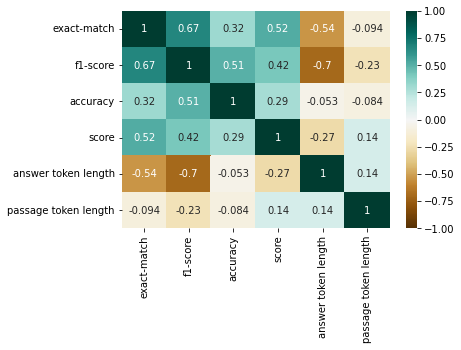

In [204]:
corr_heatmap(y_pred, y_true)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

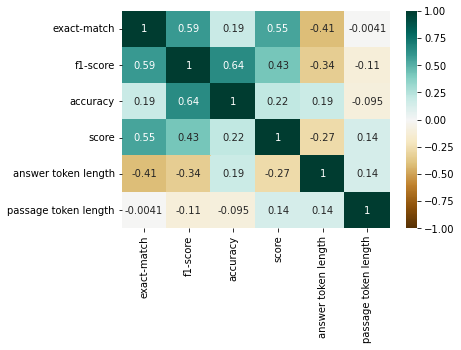

In [205]:
corr_heatmap(d_y_pred, d_y_true)